In [2]:
import numpy as np
import matplotlib.pyplot as plt

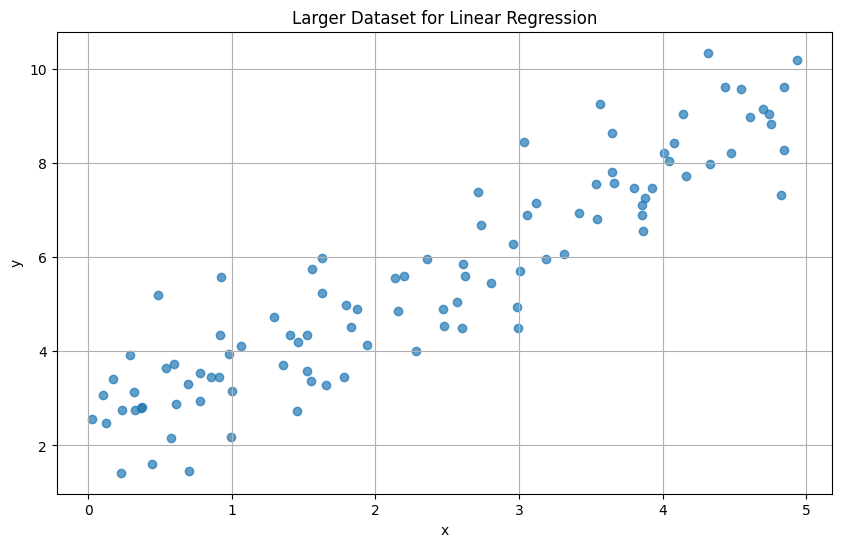

In [3]:
# Generate a synthetic dataset with 100 examples
np.random.seed(42)  # For reproducibility
X_large = 5 * np.random.rand(100, 1)
y_large = 2 + 1.5 * X_large + np.random.randn(100, 1)  # y = 2 + 1.5x + noise

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_large, y_large, alpha=0.7)
plt.title('Larger Dataset for Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [4]:
# Initialize weights
w_init_large = np.zeros((2, 1))

# Set hyperparameters
alpha_large = 0.01
iterations_large = 1000

In [5]:
def predict(X, w):
    # Add a column of ones to X to handle the intercept term w₀
    # ones = 
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b.dot(w)

In [6]:
def compute_cost(X, y, w):
    p = predict(X,w)

    errors = p - y
    s = np.sum(errors**2)
    m = len(y)
    j = s/(2*m)
    
    return j

In [7]:
def normal_equation(X, y):
    
    # Add intercept term
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    # Calculate weights using normal equation
    
    
    return w
# Calculate weights using normal equation
w_normal = normal_equation(X_large,y_large)



In [8]:
def gradient_descent(X, y, w, alpha, iterations):
    
    m = len(y)
    cost_history = []
    w_history = []
    
    for i in range(iterations):
        # Add column of ones to X (for w₀)
        X_b = np.c_[np.ones((X.shape[0],1)),X]
        
        # Calculate predictions
        predictions = X_b.dot(w)
        
        # Calculate errors
        
        errors = predictions - y
        # Calculate gradients

        grad = (1/m)*(X_b.T.dot(errors))
        
        # Update weights
        w = w - alpha * grad
        
        # Store cost and w history
        
        cost = compute_cost(X,y,w)
        cost_history.append(cost)
        w_history.append(w)
        
       
    
    return w, cost_history, w_history

In [9]:
w_final, cost_history, w_history = gradient_descent(X_large,y_large,w_init_large,alpha_large,iterations_large)

*# Task 1: Apply gradient descent and normal equation to above larger dataset and calculte final weights*

In [10]:
print("Normal Equation Results:")
print(f"w₀ (intercept) = {w_normal[0, 0]:.6f}")
print(f"w₁ (slope) = {w_normal[1, 0]:.6f}")

print("\nGradient Descent Results:")
print(f"w₀ (intercept) = {w_final[0, 0]:.6f}")
print(f"w₁ (slope) = {w_final[1, 0]:.6f}")

Normal Equation Results:
w₀ (intercept) = 2.215096
w₁ (slope) = 1.408045

Gradient Descent Results:
w₀ (intercept) = 2.094590
w₁ (slope) = 1.446030


*# Task 2: Visualize the convergence of cost function*

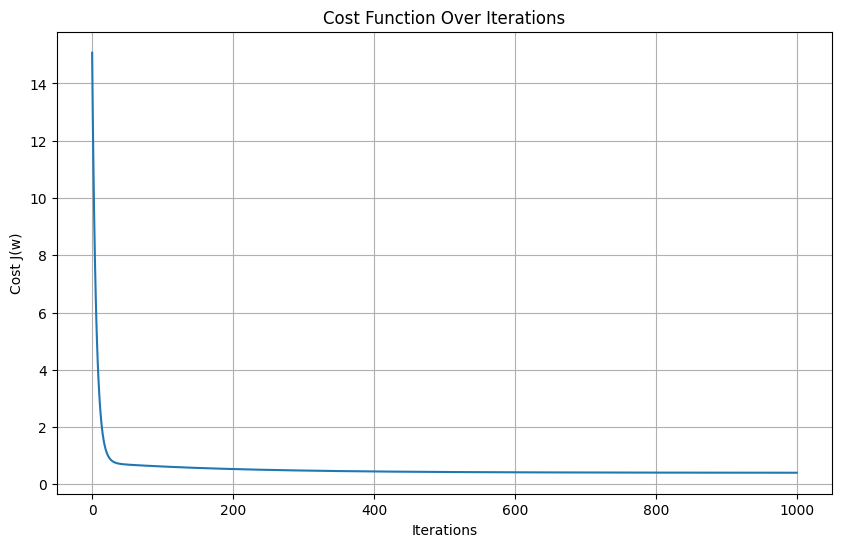

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations_large), cost_history)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J(w)')
plt.grid(True)
plt.show()

*# Task 3: Plot the regression line along with the original data*

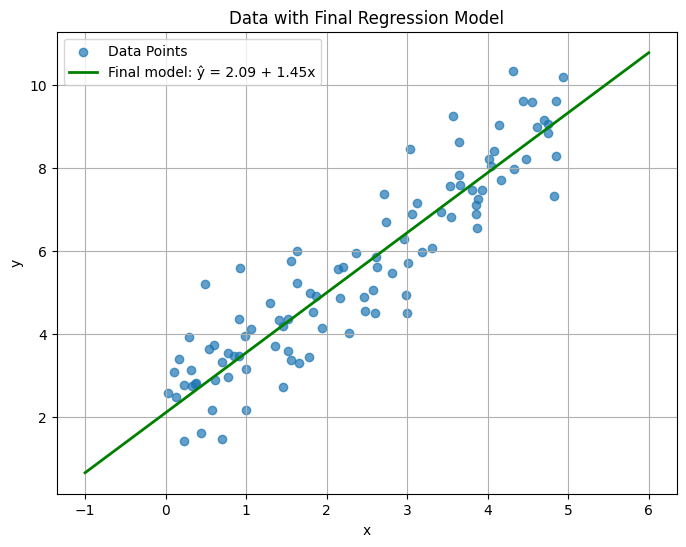

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_large, y_large, alpha=0.7,label = 'Data Points')

# Plot the final model line
x_line = np.array([[-1], [6]])
x_line_b = np.c_[np.ones((2, 1)), x_line]
y_line_final = x_line_b.dot(w_final)
plt.plot(x_line, y_line_final, 'g-', linewidth=2, 
         label=f'Final model: ŷ = {w_final[0, 0]:.2f} + {w_final[1, 0]:.2f}x')

plt.title('Data with Final Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

*# Task 4: Calculate MSE, RMSE and MAE*

In [13]:
predictions = predict(X_large,w_init_large)
errors = predictions - y_large
# Calculate Mean Squared Error (MSE)
mse = np.mean(errors ** 2)
print(f"\nMean Squared Error: {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(errors))
print(f"Mean Absolute Error: {mae:.4f}")


Mean Squared Error: 35.6779
Root Mean Squared Error: 5.9731
Mean Absolute Error: 5.5253
